<a href="https://colab.research.google.com/github/JonasNobre/Projeto_Pratico_Automato/blob/main/Projeto_Pr%C3%A1tico_LFA_2024_Q1_Automatos_Finitos_na_Pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linguagens Formais e Autômatos [2024.Q1]**
Prof. Alexandre Donizeti Alves

Fábio Massayuki Oyakawa

Jonas Costa Nobre

Renan Kendi Tinen

**AFD**

In [3]:
def afd(M, w):
  # 'extrai' os elementos da tupla
  δ, q, F = M

  for s in w:
    q = δ[(q, s)]

  return q in F

In [4]:
# funcao de transicao
δ = {
    ('q0', 'd'): 'q1',
    ('q1', 'e'): 'q0',
    ('q1', 'c'): 'q5',
    ('q1', 'd'): 'q2',
    ('q2', 'e'): 'q1',
    ('q2', 'c'): 'q6',
    ('q2', 'd'): 'q3',
    ('q3', 'e'): 'q2',
    ('q3', 'c'): 'q7',
    ('q3', 'd'): 'q4',
    ('q4', 'e'): 'q3',
    ('q5', 'c'): 'q8',
    ('q5', 'd'): 'q6',
    ('q5', 'b'): 'q1',
    ('q6', 'e'): 'q5',
    ('q6', 'd'): 'q7',
    ('q6', 'b'): 'q2',
    ('q7', 'e'): 'q6',
    ('q7', 'c'): 'q9',
    ('q7', 'b'): 'q3',
    ('q8', 'c'): 'q10',
    ('q8', 'b'): 'q5',
    ('q9', 'b'): 'q7',
    ('q10', 'c'): 'q11',
    ('q10', 'b'): 'q9',
    ('q11', 'd'): 'q12',
    ('q11', 'b'): 'q10',
    ('q12', 'e'): 'q11',
    ('q12', 'd'): 'q13',
    ('q13', 'e'): 'q12',
    }

In [5]:
# AFD representado por uma 3-upla, ao invés de uma 5-upla
# O alfabeto e conjunto de estados podem ser inferidos da funcao de transicao
M = (δ, 'q0', ['q4', 'q9', 'q13'])

In [6]:
afd(M, "dcdbdcc")

True

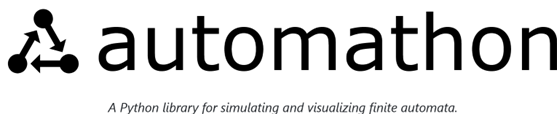

In [7]:
!pip install automathon --upgrade

  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3


In [8]:
from automathon import DFA
from IPython.display import Image, display

Q = {'q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13'}
sigma = {'e', 'c', 'd', 'b'} #direcoes, como em um joystick
delta = { 'q0' : {'d' : 'q1'},
          'q1' : {'e' : 'q0', 'c' : 'q5', 'd' : 'q2'},
          'q2' : {'e' : 'q1', 'c' : 'q6', 'd' : 'q3'},
          'q3' : {'e' : 'q2', 'c' : 'q7', 'd' : 'q4'},
          'q4' : {'e' : 'q3'},
          'q5' : {'c' : 'q8', 'd' : 'q6', 'b' : 'q1'},
          'q6' : {'e' : 'q5', 'd' : 'q7', 'b' : 'q2'},
          'q7' : {'e' : 'q6', 'c' : 'q9', 'b' : 'q3'},
          'q8' : {'c' : 'q10', 'b' : 'q5'},
          'q9' : {'b' : 'q7'},
          'q10' : {'c' : 'q11', 'b' : 'q8'},
          'q11' : {'d' : 'q12', 'b' : 'q10'},
          'q12' : {'e' : 'q11', 'd' : 'q13'},
          'q13' : {'e' : 'q12'}
        }
initial_state = 'q0'
F = {'q4', 'q9', 'q13'} #locais/ comodos para o robo aspirar

automata = DFA(Q, sigma, delta, initial_state, F)

In [9]:
automata.is_valid()

True

In [10]:
automata.accept("ddedd")

False

In [11]:
automata.accept("dcdbdcc")

True

In [12]:
not_automata = automata.complement()
not_automata.accept("dee")

False

In [13]:
automata_nfa = automata.get_nfa()
automata_nfa.accept("dee")

False

 **`Visualização`**

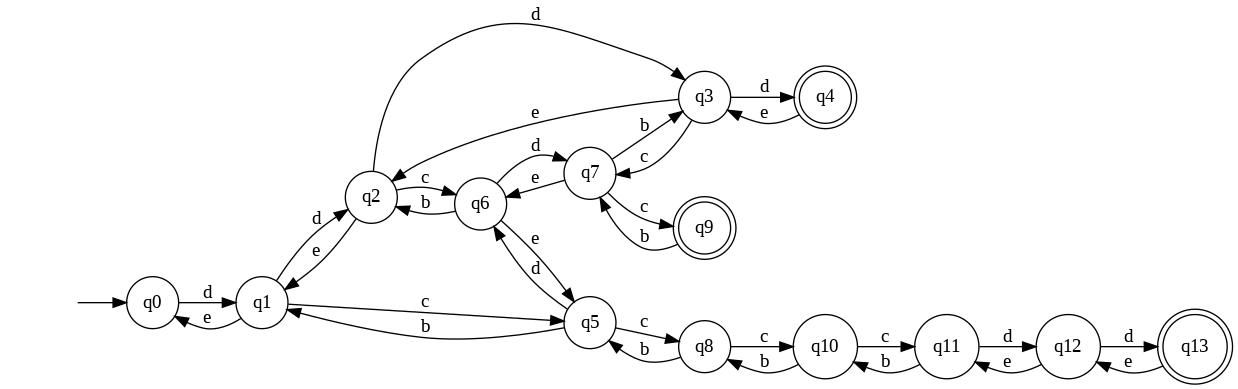

In [14]:
# estilo default
automata.view("afd01")
display(Image(filename="afd01.gv.png"))

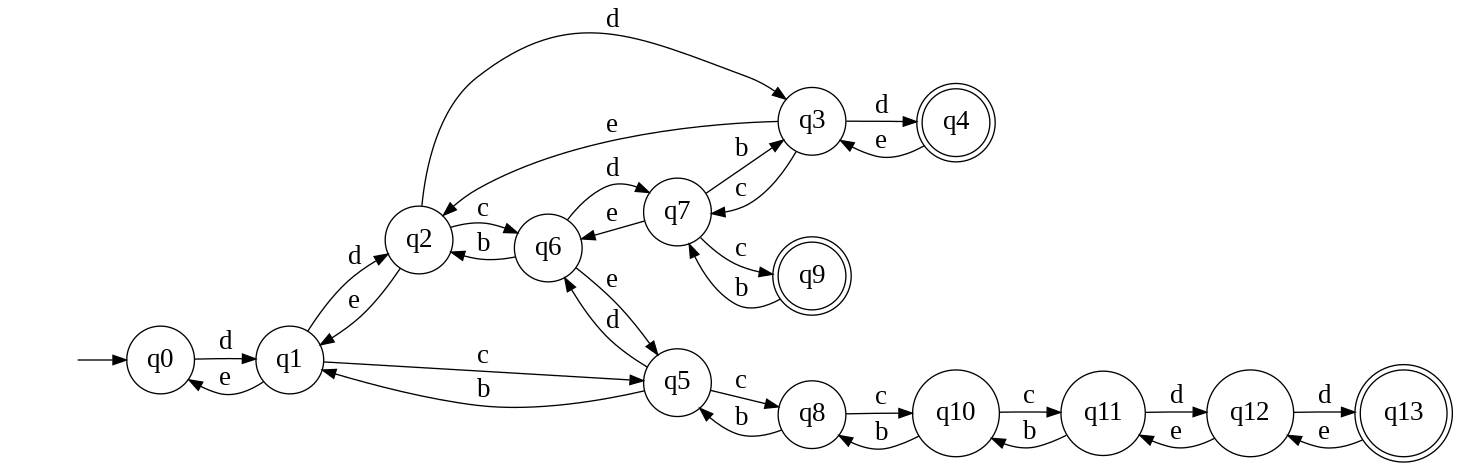

In [15]:
# estilo personalizado (melhor visualização)
automata.view(
    file_name="afd01_personalizado",
    node_attr={'fontsize': '20'},
    edge_attr={'fontsize': '20pt'}
)
display(Image(filename="afd01_personalizado.gv.png"))

**Referências:**

https://github.com/rohaquinlop/automathon

https://rohaquinlop.github.io/automathon/